# Web Scraping

Web scraping is a technique for harvesting data from a webpage. *Scraping* (and its slightly more complex counterpart, **crawling**) is an effective way to get text data and process it for analysis. 

There are multiple techniques, but today we're going to use the requests library to gather HTML data and then use BeautifulSoup to process that HTML into the data we want. 

in this notebook, we will **scrape** data from the White House website -- in particular, we will scrape the transcripts of press briefings related to covid-19. We will scrape from this url: https://www.whitehouse.gov/briefing-room/press-briefings/ 
We will also learn about libraries, caching, defining functions, and some basics of HTML. 

# References
https://www.w3schools.com/html/html_intro.asp
https://www.whitehouse.gov/briefing-room/
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# Libraries
First, we need to **import** our Libraries. 
Libraries in python are essentially a chunk of code that we can import and use. They might contain new fuctions or object types that we can use in our code. If you think of programming with python as spellcasting, each library is like a spellbook. When we "import" a library, we're telling python to open that spellbook so we can cast its spells (call its functions) at will.

Libraries are often structured as a set of modules that you can import separately (see below where we **import** BeautifulSoup **from** bs4). You may decide to import a specific module from a library to help your code run faster, like jumping to a specific chapter in a spellbook. 

There are many, many, many python libraries available. Good ones will have documentation available, though the quality of that documentation varies.  

It is standard practice to import any libraries you will use at the very beginning of your file. You can technically imort a library any time before you need it, but it's helpful to group them all at the biginning so that you (and future re-users of your code) know what libraries need to be installed. (All libraries we'll use today should already be installed in our environment. We won't cover installation today, but we can help if oyu need it!)

# What libraries will we use today?

## requests
Requests allows us to "request" data from a data source like an API or a web page.

## json
This library allows us to read and write JSON files. JSON, which stands for JavaScript Object Notation, is a human and machine-readable data interchange format. In python, it's often used to store or exchange dictionaries and lists for later use. We will use this for caching, which we will explain later.

## bs4 & BeautifulSoup
BeautifulSoup is a commonly used webscraping tool. It allows us to parse the HTML returned by the requests library. bs4 stands for BeautifulSoup4, the larger library, and BeautifulSoup is a module. 

## datetime
datetime is a standard library that comes with Python, and it allows us to parse dates and times as objects. 


In [1]:
import requests
import json
from bs4 import BeautifulSoup
import datetime

# Caching

## What is Caching?
Caching is the  process of storing data so that future requests for that data can be served faster. In our context, it means saving the data we download, first as a python disctionary, then as a JSON file. 

## Why Cache?
Caching is useful for a lot of different reasons:
1) Caching makes your code run faster. If we **request** data from an API or website, we will have to wait until all of it is downloaded. Loading our data from a cache is much faster.
2) Caching protects you from being blocked by APIs or websites. APIs often have rate limits to prevent abuse. Caching your data means that you won't have to request every time you run your code, resulting in fewer queries, less likely
3) Caching keeps a record of your data. You can edit the caching code so that it records the date and time the data was collected, allowing for comparisons.

## How Cache?
In order to get what we need, the cache needs to 1) be readable by python and 2) remain persistent outside the python script. The technique outlined here saves the cache as a python dictionary, then saves that dictionary as a JSON file that can be read the next time the script is run. 
The block of code below is pretty much endlessly reusable--just make sure you update your file name!

In [2]:
CACHE_FNAME = 'wh_cache.json' 
#try to open the cache file
try:
    cache_file = open(CACHE_FNAME, 'r') #open the file
    cache_contents = cache_file.read() # read the file
    CACHE_DICTION = json.loads(cache_contents) #load the JSON string into a dictionary called CACHE_DICTION
    cache_file.close()
#if the file won't open, create an empty dictionary where we will store the results
except:
    CACHE_DICTION = {}


You may notice that the variable CACHE_DICTION and CACHE_FNAME are uppercase rather than lowercase, which goes against what we've described as python convention. That is done because they are **global** variables, which we will need to access within and outside the functions we will define. Making them uppercase prompts the reader to pay attention to these variables throughout the rest of the code. 

# Build your own Functions
You've been introduced to the pre-made functions in python, like print(), type(), and len(). But we haven't touched one of the most powerful tools in python, **function definition**, which allows us to create customized functions to suit our own needs. 

## When should I make a function? Why should I bother, when I can just write the code?
This may be confusing to new python learners who are just starting out writing a litte bit of code at a time. Once you start writing more complex scritps, however, defining functions can be a really helpful way of organizing your code and making it readable for other programmers (and for future you!). 

Let's start by making a simple function that turns a string into a list of words. *(Note that python doesn't know what we mean by 'word' here. How do we make it do what we want?)*

## Anatomy of a function
input: Also known as arguments, this is what you will give to your function to work with.  In our example, the function will take a string as input.
process: the "meat" of your function. What does it do with the input? You can include conditionals, loops, and try/except blocks. *(It might be helpful to include print statements as you're creating a function to make sure it's doing what you want!)*
return: the object that the function returns--for example, if the function is testing whether a string contains the word "catfish", it might return a boolean value (True or False); or if the function is calculating word frequency, it might return a dictionary with the word as a key and the number of times it appears as its value.


In [3]:
def split_words(text):
    text_list = text.split()
    return text_list

In [4]:
split_words("It was on a dreary night of November that I beheld my man completed.")

['It',
 'was',
 'on',
 'a',
 'dreary',
 'night',
 'of',
 'November',
 'that',
 'I',
 'beheld',
 'my',
 'man',
 'completed.']

In [5]:
frankenstein = split_words("It was on a dreary night of November that I beheld my man completed.")
if len(frankenstein) > 5:
    print("this sentence is long!")
elif len(frankenstein) < 5:
    print("this sentence is short!")
else:
    print("I have no idea what's happening!!")

this sentence is long!


Now write a function that will test whether the word "catfish" appears in a string:

In [6]:
def is_catfish(): #what is the input?
#     process: what does the function do?
    return #what does the function return?

then run this code to see if it works:

In [ ]:
s1 = "canning of catfish"
s2 = "This is my cat! His name is Fish."

print(is_catfish(s1))
print(is_catfish(s2))

In the next cell you'll find my function to write new data to the cache. Read through it and try to unpack its parts (input, process, return). 


In [7]:
def write_to_cache(url, req_text):
    CACHE_DICTION[url] = req_text
    dumped_json_cache = json.dumps(CACHE_DICTION)
    fw = open(CACHE_FNAME,"w")
    fw.write(dumped_json_cache)
    fw.close()
    return None

Input: 1) the URL given to requests, and 2) a varilable called "req_text", a string containing the results of that request. 

Process: 1) create a dictionary entry in CACHE_DICTION with the url as the key and req_text as a value. 2) convert CACHE_DICTION to a json string and save it to the cache filename defined earlier. 3) close the file. 

Return: None! This function doesn't need to return anything, so we set return to None. 

# Web Scraping Time!

Now that we've got our caching functions set, we can get to the fun part: web scraping!


A note before we begin in earnest: a lot of web scraping is iterative. You will likely need to spend some time refining exactly which url you need, which elements and attributes you're interested in, and how you need to clean up the text. Plan on some trial and error, and check out the [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for help.


Before we get to the soup, let's look at our data source. (You should ALWAYS do this before web scraping!) 
Navigate to [this statement from the White House website](https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/20/remarks-by-president-biden-and-president-zelenskyy-of-ukraine-in-joint-statement/)
Right click, ctrl click, or cmd-click anywhere, and select 'Inspect.' What you'll see will depend on your browser, but it should show you the raw HTML. You don't need to be an expert in HTML to scrape it, but we'll go through some basics. 
If you know anything about XML, HTML is pretty similar, though the use case is different. HTML describes the structure of a web page and tells your browser how to display them.

**elements** give the HTML document its structure. Elements function like containers, and are structured as a start tag, some content, and an end tag, like so:  

**Elements** can have **attributes**, which further specify how content should be displayed. The < a > tag, for example, is for hyperlinks. The link itself is attached to the attribute 'href'. The example blow also has an attribute 'class', which further defines how the element should be displayed or interacted with. 

You can find [a list of HTML elements and what they are for on w3schools](https://www.w3schools.com/TAGS/default.asp), but we are going to focus on:
- div (a divider element)
- p  (for "paragraph," a plain text element)
- h1, h2, etc. (headings) 
- a (for links, as mentioned above)

In [37]:
#scrape one page
url = "https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/20/remarks-by-president-biden-and-president-zelenskyy-of-ukraine-in-joint-statement/"
if url in CACHE_DICTION:
    print("Getting data from Cache...")
    wh_resp = CACHE_DICTION[url]
else:
    wh_resp = requests.get(url).text
    write_to_cache(url, wh_resp)

Getting data from Cache...


In [38]:
print(wh_resp)

<!doctype html>
<html class="no-js alert__has-cookie" lang="en-US">
<head>
	<meta charset="utf-8">
	<meta name="google" content="notranslate">
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11">
	
	<!-- If you're reading this, we need your help building back better. https://usds.gov/ -->
<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />

	<title>Remarks by President Biden and President Zelenskyy of Ukraine in Joint Statement - The White House</title>
	<link rel="canonical" href="https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/20/remarks-by-president-biden-and-president-zelenskyy-of-ukraine-in-joint-statement/" />
	<meta property="og:locale" content="en_US" />
	<meta property="og:type" content="article" />
	<meta property="og:title" content="Remarks by President Biden and President Zele

Looks pretty awful, right? 

Now this is where we bring in BeautifulSoup to parse this HTML into some usable data.

First we convert the html into a "soup", using its html parser. 

In [28]:
#parse with beautiful soup
soup = BeautifulSoup(wh_resp, 'html.parser')
print(soup)

<!DOCTYPE doctype html>

<html class="no-js alert__has-cookie" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="notranslate" name="google"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<!-- If you're reading this, we need your help building back better. https://usds.gov/ -->
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<title>Remarks by President Biden and President Zelenskyy of Ukraine in Joint Statement - The White House</title>
<link href="https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/20/remarks-by-president-biden-and-president-zelenskyy-of-ukraine-in-joint-statement/" rel="canonical">
<meta content="en_US" property="og:locale">
<meta content="article" property="og:type">
<meta content="Remarks by President Biden and President Zelenskyy of Ukraine in Joint St

Maybe not beautiful, but that's only the first step. 

BeautifulSoup gives us the function **find**, which searches the html and pulls out the first element that matches the parameters we give it.
soup.find([element title], [attribute name]='attribute text')

Here's an example:

In [26]:
title = soup.find('h1', class_="page-title topper__title news") #bs4 uses class_ instead of class because it means somehting different in python
print(title)

<h1 class="page-title topper__title news" data-beat="1" data-beat-topper="1">
						Remarks by President<span class="dewidow"> </span>Biden and President Zelenskyy of Ukraine in Joint<span class="dewidow"> </span>Statement					</h1>


There, we got the title element with all the bells and whistles. But what if we just want the content? or a specific attribute?
Luckily, BeautifulSoup makes each html element accessible as a python object. Here's how to get text:

In [21]:
title.text

'\n\t\t\t\t\t\tRemarks by President\xa0Biden and President Zelenskyy of Ukraine in Joint\xa0Statement\t\t\t\t\t'

Still not perfect, but you can use functions like strip() to make that cleaner. (Try it yourself!)

We can also access the attributes as dictionary keys:

In [22]:
title['class']

['page-title', 'topper__title', 'news']

Now that works great for unique elements, but we're a text analysis group. We want text and *lots of it.*
Go back to the inspector and look for the elements that contain the body of the statement. 

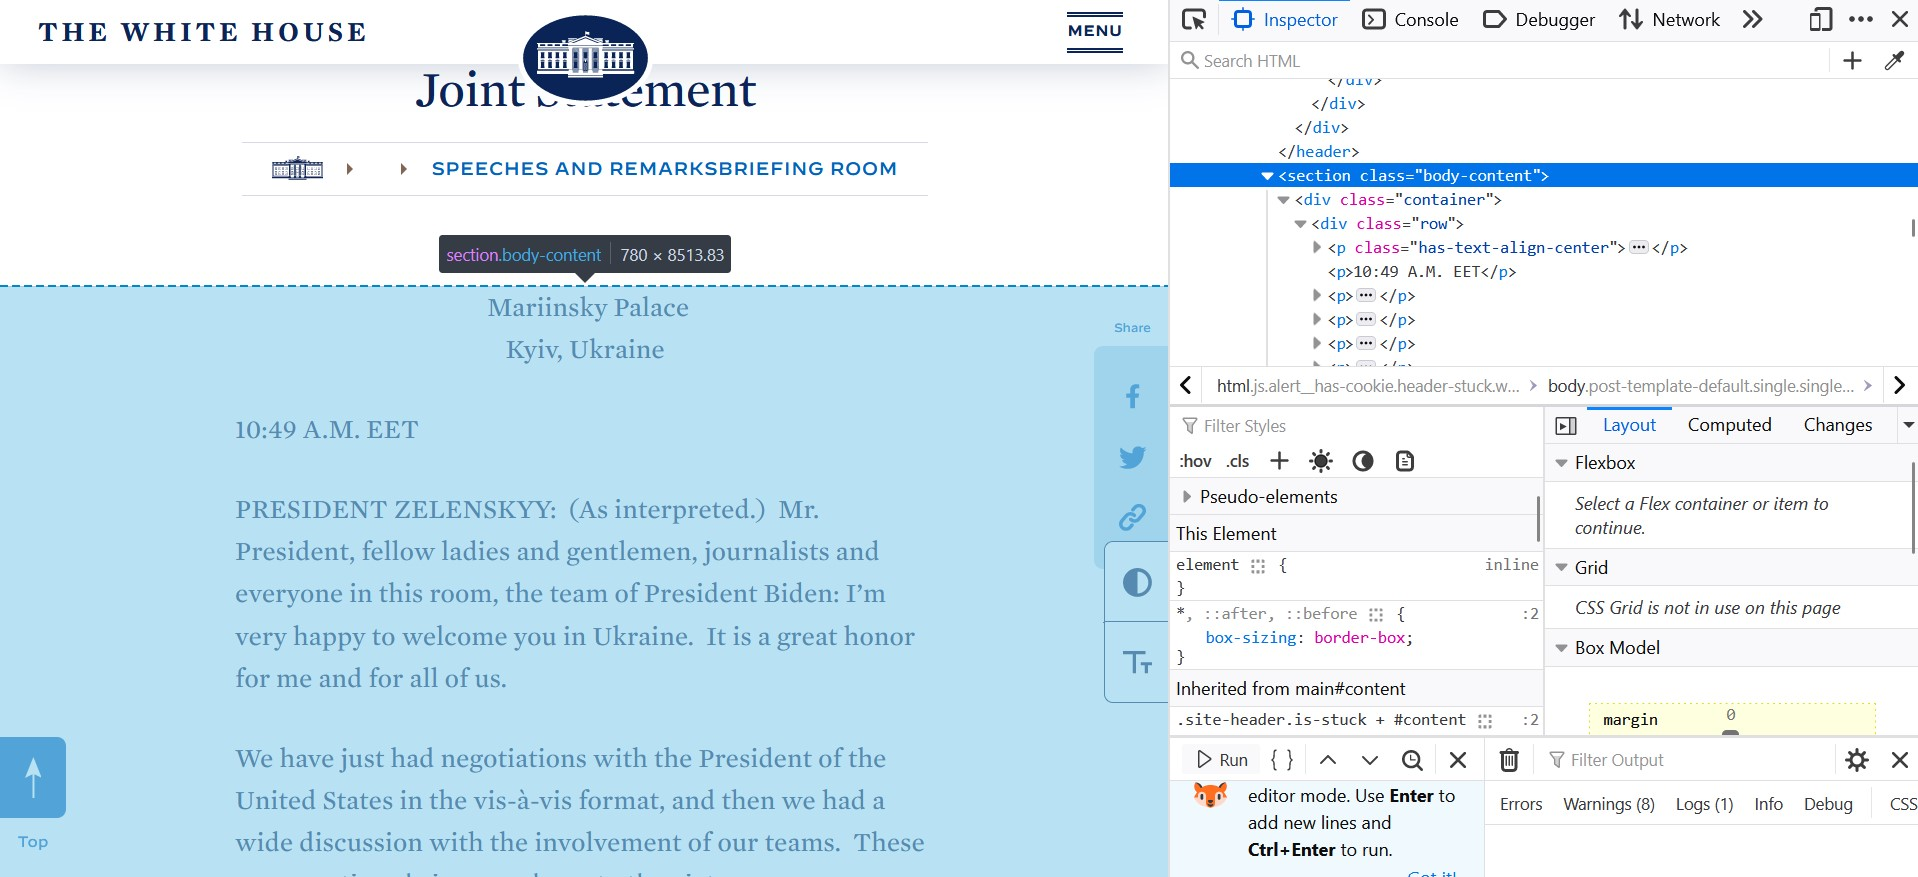


The statement is structured as several < p > tags within a larger < section > element with class "body-content"

There are multiple ways to approach this, but let's start with those p elements. We'll try brute force using BeautifulSoup's find_all() funciton:

In [30]:
soup.find_all('p')

[<p>
 <strong>The White House</strong><br/>
 								1600 Pennsylvania Ave NW<br/>
 								Washington, DC 20500
 							</p>,
 <p class="has-text-align-center"> Mariinsky Palace<br/>Kyiv, Ukraine</p>,
 <p>10:49 A.M. EET</p>,
 <p>PRESIDENT ZELENSKYY:  (As interpreted.)  Mr. President, fellow ladies and gentlemen, journalists and everyone in this room, the team of President Biden: I’m very happy to welcome you in Ukraine.  It is a great honor for me and for all of us.</p>,
 <p>We have just had negotiations with the President of the United States in the vis-à-vis format, and then we had a wide discussion with the involvement of our teams.  These conversations brings us closer to the victory. <br/><br/>And we hope that this year, the 2023, will become a year of victory.  This unprovoked and criminal Russia’s war against Ukraine and against the whole world and democratic world has to end with liberating the whole of Ukraine’s territory from Russia’s occupation and the solid guarantees of t

It's a list! that means we can iterate through it to get our data.

In [34]:
p_list = soup.find_all('p')
for p in p_list:
    print(p.text.strip())

The White House
								1600 Pennsylvania Ave NW
								Washington, DC 20500
Mariinsky PalaceKyiv, Ukraine
10:49 A.M. EET
PRESIDENT ZELENSKYY:  (As interpreted.)  Mr. President, fellow ladies and gentlemen, journalists and everyone in this room, the team of President Biden: I’m very happy to welcome you in Ukraine.  It is a great honor for me and for all of us.
We have just had negotiations with the President of the United States in the vis-à-vis format, and then we had a wide discussion with the involvement of our teams.  These conversations brings us closer to the victory. And we hope that this year, the 2023, will become a year of victory.  This unprovoked and criminal Russia’s war against Ukraine and against the whole world and democratic world has to end with liberating the whole of Ukraine’s territory from Russia’s occupation and the solid guarantees of the long-term security for our country as well as Europe and the whole world.
Right now, in Ukraine, the destiny of the interna

We can also use find() to get the < section > header and extract the text from it. 

In [36]:
statement = soup.find('section', class_="body-content") #bs4 uses class_ instead of class because it means somehting different in python
print(statement.text)




 Mariinsky PalaceKyiv, Ukraine
10:49 A.M. EET
PRESIDENT ZELENSKYY:  (As interpreted.)  Mr. President, fellow ladies and gentlemen, journalists and everyone in this room, the team of President Biden: I’m very happy to welcome you in Ukraine.  It is a great honor for me and for all of us.
We have just had negotiations with the President of the United States in the vis-à-vis format, and then we had a wide discussion with the involvement of our teams.  These conversations brings us closer to the victory. And we hope that this year, the 2023, will become a year of victory.  This unprovoked and criminal Russia’s war against Ukraine and against the whole world and democratic world has to end with liberating the whole of Ukraine’s territory from Russia’s occupation and the solid guarantees of the long-term security for our country as well as Europe and the whole world.
Right now, in Ukraine, the destiny of the international order based on international order is decided.  And we, together wi

But wait, it looks different! Why?

Because this pulls only the p elements within the < section > element, it omitted < p > elements that existed outside the section, one of which contains the address of the white house at the bottom of the page. Not much of a problem for our current use case, but something to be aware of!

Now, define a function that will take a soup object (like the one we worked with above) and **return** a dictionary with the following keys:
- text (the full text of the statement)
- title (the title of the statement)
- date (the date on which the statement was released)


In [ ]:
def create_statement_dict(soup):

    pass #comment this out when you run your code later - the word 'pass' ensures that your code won't throw an error - but also that the function doesn't work


In [ ]:
soup_dict = create_statement_dict(soup)
print(soup_dict['title'])
print(soup_dict['date'])

# Crawling!

Crawling is when you use links found in HTML pages to **crawl** onto those pages and scrape them in turn. You can think of it as request chaining: you scrape a page with a feed for all the links, then scrape each of those pages. This allows us to get a lot of data quickly without having to copy and paste a lot of urls.  

The easiest pages to crawl are feeds or other pages that have organized lists of links (like site maps or table of contents). Luckily for us, the White House briefing room page provides that for us. 

Let's pretend that we want to scrapw 

1) Scrape the briefing room feed page and turn it into soup 
2) find() the container element for the feed itself
3) extract the href attributes (the link to each briefing) from all < a > elements in that container into a list
4) use a for loop to scrape the briefings using url from step 3 
5) extract the title, date, and text from each briefing and save it as a dictionary

Once we have those dictionaries, we can do some text analysis within python, or extract them into plain text files to be uploaded into text anlylsis software. 